In [152]:
library(ggplot2)
library(reshape2)
library(plyr)
library(xtable)
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
theme_eb <- function() {
    col <- 'gray50'
    theme_minimal() +
    theme(panel.background = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          text = element_text(colour = col),
          axis.line = element_line(colour = col),
          axis.title.y = element_text(margin = margin(r = 10)),
          axis.title.x = element_text(margin = margin(t = 10, b = 10)),
          axis.text.y = element_text(size = rel(1.5),
                                     margin = margin(r = rel(0)), colour = col),
          axis.text.x = element_text(size = rel(1.5),
                                     margin = margin(t = rel(0)), colour = col),
          panel.border = element_blank(),
          axis.line.x = element_line(size = rel(1.5), lineend = 2),
          axis.line.y = element_line(size = rel(1.5), lineend = 2),
          strip.text = element_text(colour = col, size = rel(1)),
          legend.position = 'top',
          legend.margin = margin(t = -2, b = -5),
          panel.spacing = unit(1.5, 'lines')
         )
}

In [91]:
data_path <- '/Users/eb/Google Drive/Research/text_words_meaning/twm-slides/notebooks/data/'
output_path <- '/Users/eb/Google Drive/Research/text_words_meaning/twm-slides/img/figures'

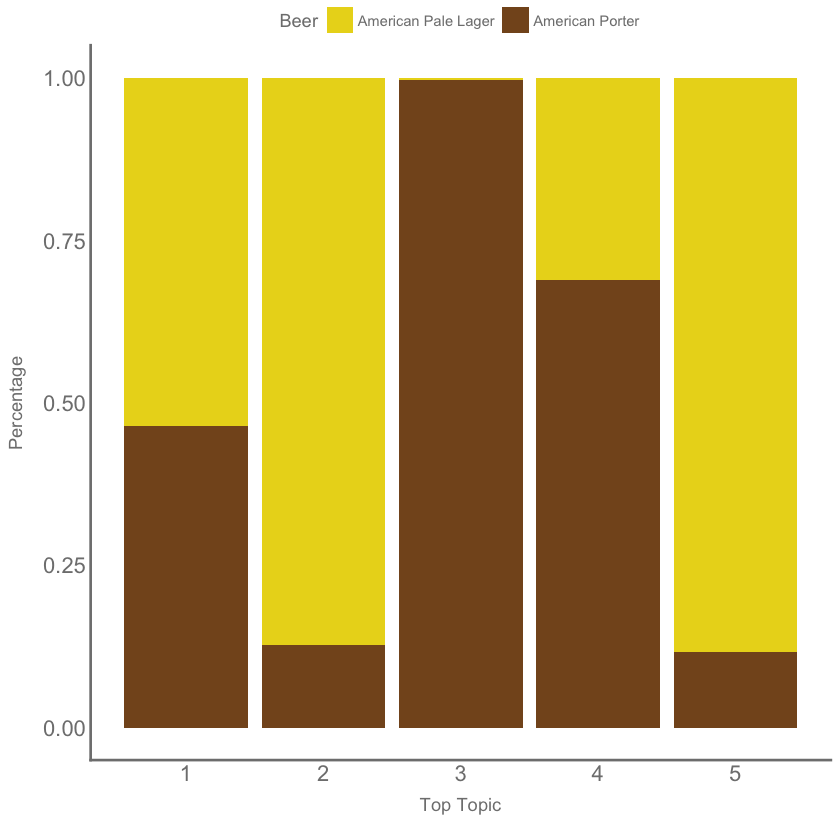

In [103]:
setwd(data_path)
df <- read.csv('2_styles_top_topic_1gram_xtab.csv')
df <- melt(df, id.vars='top_topic')
df$top_topic <- df$top_topic + 1

df$variable <- mapvalues(df$variable, from = c("American.Pale.Lager", "American.Porter"),
                         to = c("American Pale Lager", "American Porter"))

colnames(df) <- c('top_topic', 'Beer', 'value')
p <- ggplot(df, aes(x = top_topic, y = value)) +
    geom_bar(stat = "identity", aes(fill = Beer))
p + theme_eb() + scale_fill_manual(values=c('#ead61c', '#845422')) +
    xlab('Top Topic') + ylab('Percentage')

setwd(output_path)
ggsave('topic_stacked_1gram.pdf', width=6, height=4.5)

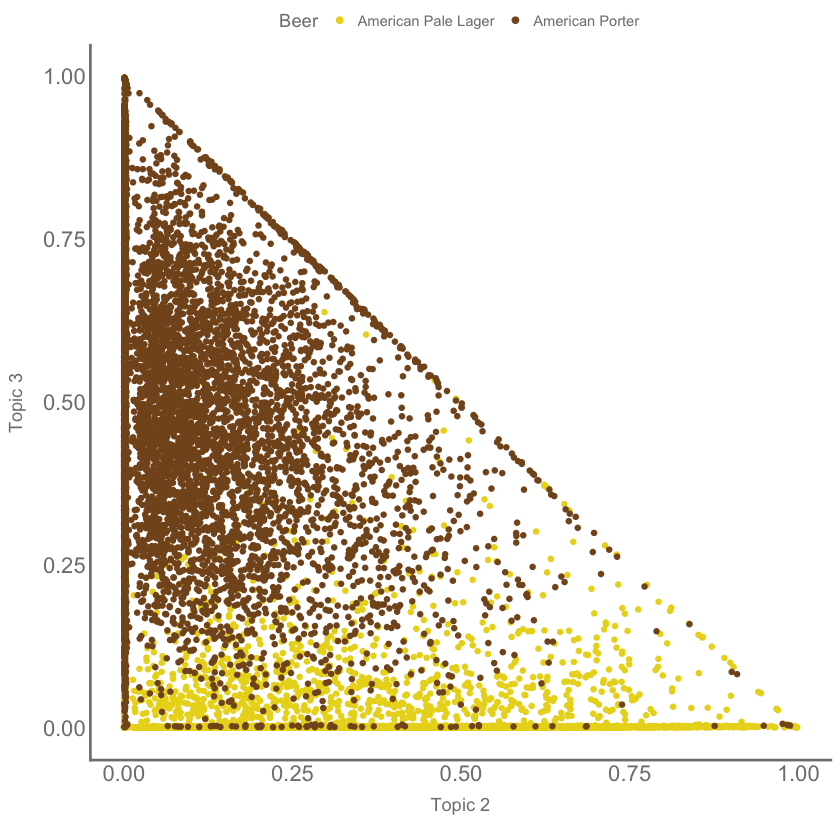

In [150]:
setwd(data_path)
df <- read.csv('2_styles_doc_topic_1gram_matrix.csv')

ggplot(df, aes(x = X1, y = X2)) + geom_point(aes(colour = style_name, shape='.')) +
    theme_eb() + scale_color_manual(values=c('#ead61c', '#845422')) +
    xlab('Topic 2') + ylab('Topic 3') + scale_shape(guide = 'none') +
    labs(color = "Beer")
setwd(output_path)
ggsave('topic_scatter_1gram.pdf', width=6, height=4.5)

In [154]:
df$is_larger <- FALSE
df$is_larger[df$X1 > df$X2] <- TRUE

print(xtable(table(df$style_name, df$is_larger)))

% latex table generated in R 3.3.3 by xtable 1.8-2 package
% Sun Nov 19 10:35:05 2017
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & FALSE & TRUE \\ 
  \hline
American Pale Lager & 859 & 5991 \\ 
  American Porter & 10559 & 616 \\ 
   \hline
\end{tabular}
\end{table}


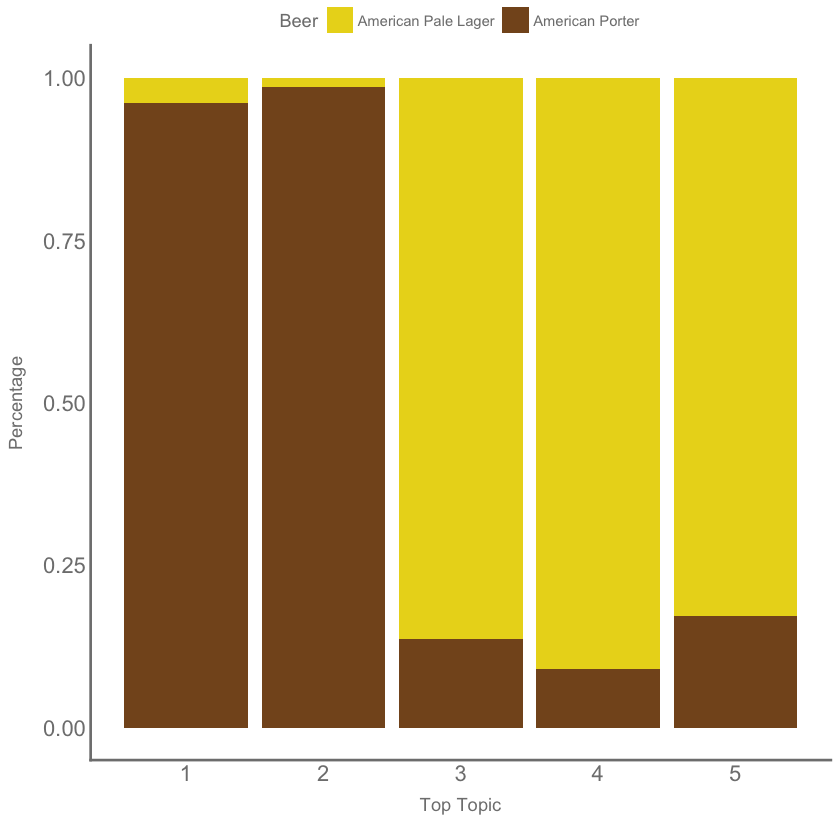

In [155]:
setwd(data_path)
df <- read.csv('2_styles_top_topic_xtab.csv')
df <- melt(df, id.vars='top_topic')
df$top_topic <- df$top_topic + 1

df$variable <- mapvalues(df$variable, from = c("American.Pale.Lager", "American.Porter"),
                         to = c("American Pale Lager", "American Porter"))

colnames(df) <- c('top_topic', 'Beer', 'value')
p <- ggplot(df, aes(x = top_topic, y = value)) +
    geom_bar(stat = "identity", aes(fill = Beer))
p + theme_eb() + scale_fill_manual(values=c('#ead61c', '#845422')) +
    xlab('Top Topic') + ylab('Percentage')

setwd(output_path)
ggsave('topic_stacked.pdf', width=6, height=4.5)

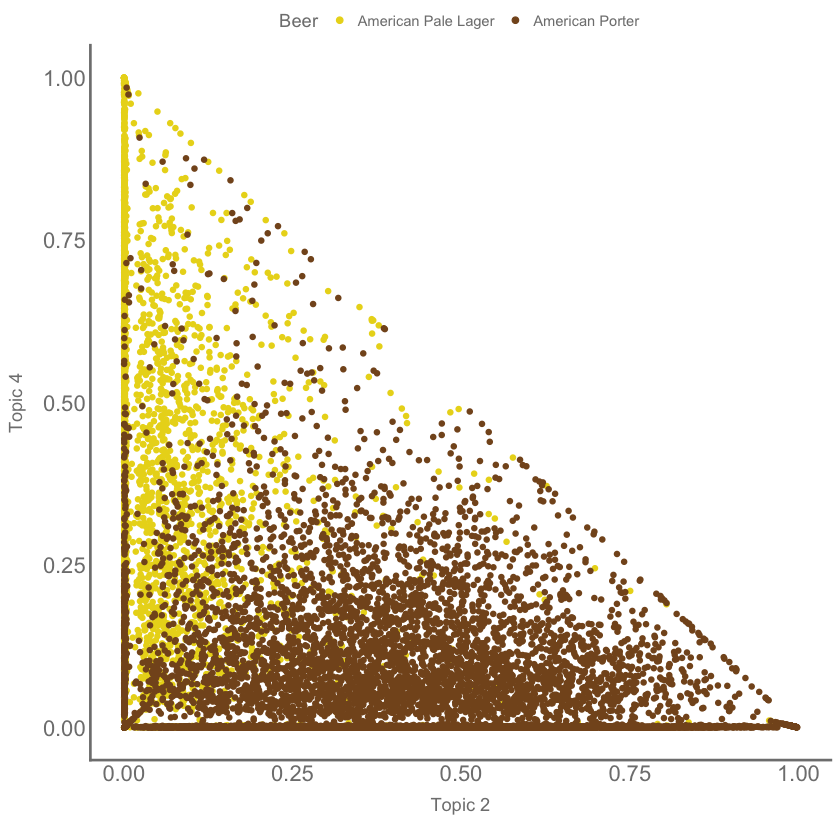

In [156]:
setwd(data_path)
df <- read.csv('2_styles_doc_topic_matrix.csv')

ggplot(df, aes(x = X1, y = X3)) + geom_point(aes(colour = style_name, shape='.')) +
    theme_eb() + scale_color_manual(values=c('#ead61c', '#845422')) +
    xlab('Topic 2') + ylab('Topic 4') + scale_shape(guide = 'none') +
    labs(color = "Beer")
setwd(output_path)
ggsave('topic_scatter.pdf', width=6, height=4.5)

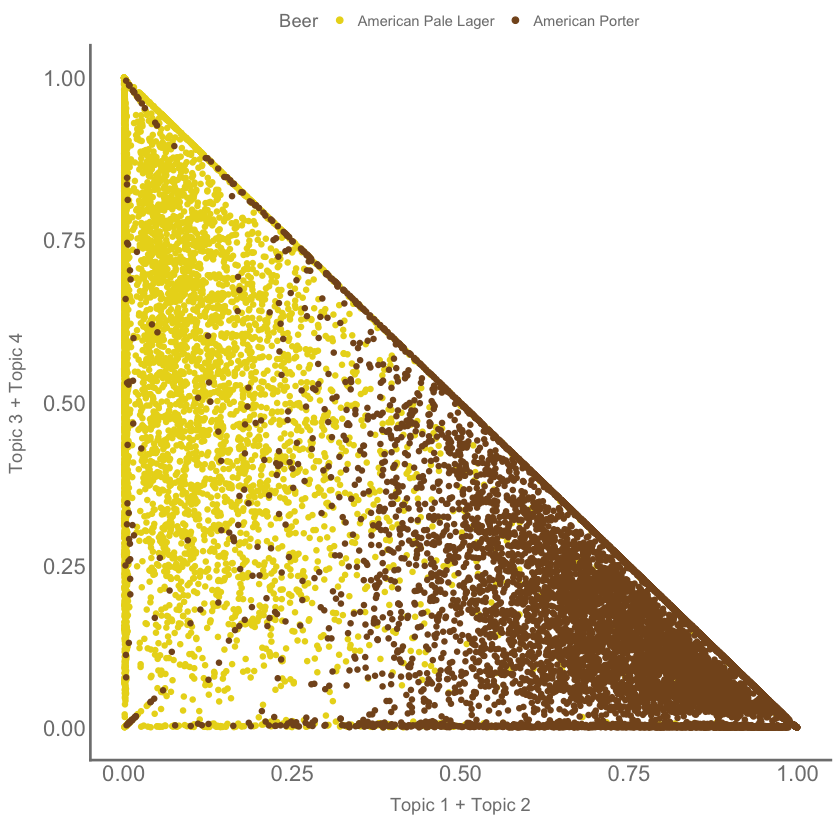

In [157]:
setwd(data_path)
df <- read.csv('2_styles_doc_topic_matrix.csv')

ggplot(df, aes(x = X0 + X1, y = X2 + X3)) + geom_point(aes(colour = style_name, shape='.')) +
    theme_eb() + scale_color_manual(values=c('#ead61c', '#845422')) +
    xlab('Topic 1 + Topic 2') + ylab('Topic 3 + Topic 4') + scale_shape(guide = 'none') +
    labs(color = "Beer")
setwd(output_path)
ggsave('topic_scatter_additive.pdf', width=6, height=4.5)

In [159]:
df$is_larger <- FALSE
df$is_larger[ df$X2 + df$X3 > df$X0 + df$X1 ] <- TRUE

print(xtable(table(df$style_name, df$is_larger)))

% latex table generated in R 3.3.3 by xtable 1.8-2 package
% Sun Nov 19 10:46:43 2017
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & FALSE & TRUE \\ 
  \hline
American Pale Lager & 616 & 6234 \\ 
  American Porter & 10723 & 452 \\ 
   \hline
\end{tabular}
\end{table}
